# Notebook **One** - Identifying the position(s) of Brightest Cluster Galaxies (BCGs)

This notebook contains everything necessary for you to work on the first step of this project - actually identifying which member galaxy (or galaxies, or none) of a galaxy cluster is the **BCG**. 

**Galaxy clusters** are single, gravitationally bound, objects made up of a **lot** of dark matter, quite a lot of hot gas (which is what emits X-rays), and the galaxies themselves (there are other components, but they don't matter right now).

**A BCG** is the most massive, brightest, galaxy in a cluster (though there can be multiple BCGs, or no obvious BCG at all).

**What will we get out of this stage of the project?**

* For each galaxy cluster in this sample, we get the *coordinates* of the galaxy (or galaxies) that you have identified as being the BCG(s).
* We will also know if there is **no obvious BCG** which is very useful information in and of itself.

*Once you have examined all of these clusters, we will begin to gather more information about these galaxies from some online databases.*

## Import statements and reading history/sample

In [1]:
%matplotlib ipympl

from ident_run_setup import cosmo, side_length, HISTORY_FILE_PATH, load_history, proj_name, update_history, InteractiveView

from xga.products import Image

from astropy.wcs import WCS
from astropy.units import Quantity
from astropy.visualization import MinMaxInterval, LogStretch
import matplotlib
from matplotlib import pyplot as plt
# from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

%matplotlib ipympl

/Users/dt237/code/XGA/xga/utils.py:39: DeprecationWarning: The XGA 'find_all_wcs' function should be imported from imagetools.misc, in the future it will be removed from utils.
  warn(message, DeprecationWarning)
/Users/dt237/code/XGA/xga/__init__.py:6: UserWarning: No CIAO installation detected on system, as such all functions in xga.generate.ciao will not work.
  from .utils import xga_conf, CENSUS, OUTPUT, NUM_CORES, XGA_EXTRACT, BASE_XSPEC_SCRIPT, MODEL_PARS, MODEL_UNITS, \
/Users/dt237/software/anaconda3/envs/riley-bcg/lib/python3.12/site-packages/xarray/core/nputils.py:20: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you a

The framework I've designed for this process (i.e. these notebooks) is trying to keep a useful history of the process - it has recorded the images that we were able to download or generate, and which you'll be looking at in this notebook - and will also help you to more easily record the galaxies that you identify as being possible BCGs. 

**As this hasn't been tested much, it might be a good idea to keep your own backup copies of the coordinates you identify, by copying the 'history/bcg_ident_proj_save.json' file to some other place on your computer when you're done with each session of identifying BCGs - you could also change the name to add the date and time you made the copy** 

In [2]:
cur_history = load_history()

We read the total sample file into a Pandas dataframe:

In [3]:
# This reads the 'comma separated variable', or CSV/csv, file (which contains information about the sample of clusters
#  being investigated), from disk (on the hard-disk drive\HDD, or solid state disk\SSD) into memory (a much faster form of storage 
#  called Random Access Memory\RAM, where files being used by the operating system or currently running software live). We are using 
#  a Python module called 'Pandas' to read it in - think of it almost like a Python version of Excel
samp = pd.read_csv(cur_history['static_samp_file'])
# This method shows the top two lines of the loaded-in sample file
samp.head(2)

,name,cent_im_ra,cent_im_dec,redshift,r500,r500-,r500+,r2500,r2500-,r2500+,XCS_NAME,ang_prop_ratio
0,SDSSXCS-124,0.800578,-6.091818,0.247483,1181.028159,21.202221,23.202641,534.834740,7.579124,7.591855,XMMXCS J000312.1-060530.5,232.859967
1,SDSSXCS-2789,0.955540,2.068019,0.105285,1007.860978,17.194150,17.201505,438.706515,5.198301,5.213676,XMMXCS J000349.3+020404.8,115.802997


All cluster names:

In [4]:
print(list(samp['name'].values))

['SDSSXCS-124', 'SDSSXCS-2789', 'SDSSXCS-290', 'SDSSXCS-1018', 'SDSSXCS-134', 'SDSSXCS-119', 'SDSSXCS-209', 'SDSSXCS-15', 'SDSSXCS-71', 'SDSSXCS-5020', 'SDSSXCS-2346', 'SDSSXCS-586', 'SDSSXCS-11331', 'SDSSXCS-28849', 'SDSSXCS-31144', 'SDSSXCS-239', 'SDSSXCS-395', 'SDSSXCS-944', 'SDSSXCS-593', 'SDSSXCS-35404', 'SDSSXCS-7190', 'SDSSXCS-7783', 'SDSSXCS-5743', 'SDSSXCS-1131', 'SDSSXCS-29799', 'SDSSXCS-852', 'SDSSXCS-5830', 'SDSSXCS-5977', 'SDSSXCS-16227', 'SDSSXCS-2984', 'SDSSXCS-6955', 'SDSSXCS-64824', 'SDSSXCS-8366', 'SDSSXCS-120', 'SDSSXCS-572', 'SDSSXCS-226', 'SDSSXCS-22', 'SDSSXCS-103', 'SDSSXCS-212', 'SDSSXCS-19922', 'SDSSXCS-890', 'SDSSXCS-31', 'SDSSXCS-325', 'SDSSXCS-26424', 'SDSSXCS-5159', 'SDSSXCS-9803', 'SDSSXCS-1884', 'SDSSXCS-5', 'SDSSXCS-13', 'SDSSXCS-5225', 'SDSSXCS-21', 'SDSSXCS-23', 'SDSSXCS-617', 'SDSSXCS-6245', 'SDSSXCS-21847', 'SDSSXCS-22748', 'SDSSXCS-9', 'SDSSXCS-8060', 'SDSSXCS-15984', 'SDSSXCS-75', 'SDSSXCS-667', 'SDSSXCS-9258', 'SDSSXCS-1628', 'SDSSXCS-7405', 'SDSS

## A CAVEAT

For technical reasons that I won't explain here, the only to get this interactive plot process working in Jupyter Notebooks (in its current form at least) is to run the notebook for one cluster, then restart it and run it again for the next, and so on.

This stepping through of clusters will happen automatically - once the project history has an entry for BCG coordinates from your investigation, the next time the notebook is run it will move on to the next cluster without BCG coordinates. If you want to go back to a specific cluster and overwrite your first attempt, you can set the variable below to the cluster name (e.g. 'SDSSXCS-124', make sure the name is a string with the '' around it) - **before you run the notebook again, make sure to set `overwrite_cluster=None`, and note that None doesn't have any '' around it, as it is not a string**

In [5]:
# You can change this per the instructions above
overwrite_cluster = None

# Don't change this though
if overwrite_cluster is not None and overwrite_cluster not in samp['name'].values:
    raise ValueError("The overwriting cluster name you set does not correspond to a name in the sample, check "\
        "to make sure you typed it correctly!")

Here we identify the next cluster that doesn't have any recorded BCG identifications, which will be the next one you'll work on - this makes use of the 'history' that is being written as you go through the sample.

In [6]:
# Here we use the 'complete' flag stored in the BCG identification history to measure the number of clusters
#  for which the BCG candidate process is complete
# A bit of a silly step to just extract the 'ident_complete' info from the dictionaries of particular clusters, as they
#  could have other entries (like BCG info for instance)
just_complete = {n: {'ident_complete': cur_history['bcg_identification'][n]['ident_complete']} 
                 for n in cur_history['bcg_identification']}
ident_comp_df = pd.DataFrame(just_complete).T
num_bcg_comp = ident_comp_df['ident_complete'].sum()

# Show a quick progress update on identifying the BCGs
print('BCG candidate identification is {p}% complete.'.format(p=round((num_bcg_comp/cur_history['num_clusters'])*100, 2)))

if overwrite_cluster is None:
    # Finds the first cluster with a 'False' value in the 'ident_complete' column - though only if you haven't
    #  set an overwriting cluster name above
    cur_name = ident_comp_df.loc[~ident_comp_df['ident_complete']].index[0]
else:
    cur_name = overwrite_cluster

# Now we read out the relevant row of the sample table
cur_row = samp[samp['name'] == cur_name].iloc[0]
cur_row

BCG candidate identification is 12.0% complete.


name                            SDSSXCS-395
cent_im_ra                        28.392295
cent_im_dec                       -1.304499
redshift                           0.239131
r500                            1008.220626
r500-                             20.534537
r500+                             20.566655
r2500                            466.982661
r2500-                             9.011422
r2500+                              9.08527
XCS_NAME          XMMXCS J015334.1-011816.1
ang_prop_ratio                   226.997644
Name: 16, dtype: object

## Searching for BCG candidates

Optical and near-infrared wavelengths are where galaxies in general emit the most light, and thus are easiest to see and identify. You will be looking at optical images that I have taken from the 'Dark Energy Spectroscopic Instrument' (DESI) Legacy Survey, which is essentially  a set of uniformly processed observations (some were in the telescope archives from other projects, some they proposed for specifically) that they combined and analysed - this was all to identify targets for DESI (which takes optical/near-infrared *spectra* rather than the images you are looking at). They also have an [online viewer for their survey](https://www.legacysurvey.org/viewer#IC%202455) which is pretty great (if a little slow sometimes).

For this task you will also be able to view the X-ray emission from the galaxy cluster itself - this is in another image to the right hand side, and is mostly there to provide some context for where the galaxy cluster is and where to start looking for the BCGs. The X-ray data are from a European Space Agency (ESA) telescope called XMM-Newton, which is particularly good for a lot of galaxy cluster work.

**What are you looking for?**

1. A collection of yellow-ish galaxies, with an elliptical shape - these will likely be cluster members. With enough experience it is possible to look at an image and say whether there is a cluster there or not, but you won't have this problem as **all of the optical images are centered on the X-ray coordinates of known galaxy clusters**.
2. Of those galaxies, are there any that stand out as **being much larger than the others?**
3. When you click on them and the cross-hair appears, are they within the bright extended source in the X-ray image? It is also possible that they are BCGs of another galaxy cluster in the field, so when you click does the cross seem to be associated with another extended X-ray source?

**A suggestion for a procedure to use:**

1. Identify the extended X-ray source we're centered on (by looking for the center of the red box on the X-ray image - you can also click in the centre of the optical image to put a cross-hair down).
2. Search for a population of yellow elliptical galaxies in the optical image.
3. Judge if any of those galaxies are larger and brighter than the others (there might be more than one, there might be none).
4. Click on these galaxies, see if the cross-hair falls within the extended X-ray source we are centered on (if it falls within another extended source we are still interested, but I would like you to make a note of the name, and whether it is the first, second, third, etc. candidate you have saved).
5. Zoom closer on the candidate galaxy and adjust the cross-hair to be at the center of the brightest innermost region - **you don't need to take too long on this, the cross hair being absolutely dead center is not essential, and would be a waste of your time**.
6. Click the save button, and move on to the next candidate you identified in step 4 (if there are any others).


**Notes on the tool**

* When you save a BCG candidate, the cross-hair will disappear, and a small white circle will be added to the visualisation.
* Saving writes some information about that galaxy to the BCG candidate sample file (in the outputs directory).
* If you make a mistake, you can hit the reset button (just below the save button in the toolbar) - this will remove **all** BCG candidates, and their entries in the candidate sample file.
* You may not be able to identify any candidates - in that case you have to click 'No BCG candidates' button, just below the reset button (this can also be reset though, if you clicked it accidentally).
* When you've zoomed in, you can reset back to the original view by clicking the home button at the top of the toolbar.
* If you have clicked the 'zoom to rectangle' button, you will need to click it again before you can make new cross-hairs.

***After each session (not after every cluster) of identifying BCGs you should back-up the BCG candidate sample file in the 'outputs' directory.***

### Loading/setting up images

#### DESI Legacy Survey (optical/near-infrared)

In [7]:
desi_ls_pth = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['im_path']
desi_ls_data = np.flip(plt.imread(desi_ls_pth), axis=0)

ls_wcs = WCS(naxis=2)
ls_cen = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['cen_pos']

ls_pix_scale = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['arcsec_per_pix']
ls_wcs.wcs.cdelt = [-1*(ls_pix_scale/3600), ls_pix_scale/3600]
ls_wcs.wcs.crpix = [desi_ls_data.shape[0]/2, desi_ls_data.shape[1]/2]
ls_wcs.wcs.crval = [ls_cen[0], ls_cen[1]]
ls_wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

#### XMM (X-ray)

In [8]:
# xmm_pth = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['im_path']
# xmm_im = Image(xmm_pth, 'combined', 'combined', '', '', '', Quantity(0.5, 'keV'), Quantity(2.0, 'keV'))

xm_pth = "raw_images/{n}/xmm/{n}_0.5-2.0keV_comb.fits".format(n=cur_name)
xmm_im = Image(xm_pth, 'combineed', 'combineed', '', '', '', Quantity(0.5, 'keV'), Quantity(2.0, 'keV'))

#### Putting the data together

In [9]:
im_data = {'desi-ls': desi_ls_data,
           'xmm': xmm_im.data}

im_wcs = {'desi-ls': ls_wcs,
          'xmm': xmm_im.radec_wcs}

#### Controlling how the images are displayed

In [10]:
im_scale = {'xmm': {}}
im_scale['xmm']['interval'] = MinMaxInterval()
im_scale['xmm']['stretch'] = LogStretch()
im_scale['xmm']['cmap'] = 'gnuplot2'

### The identification tool

**This is where you have to do your task**

/Users/dt237/software/anaconda3/envs/riley-bcg/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


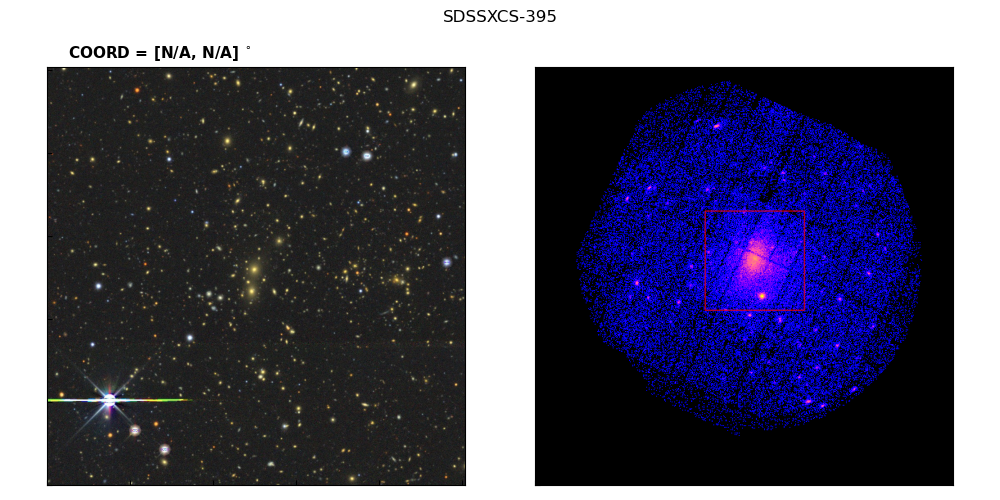

In [11]:
cur_im = InteractiveView(im_data, im_wcs, 'desi-ls', cur_name, im_scale=im_scale, figsize=(10, 5))